In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D

In [90]:
data = pd.read_csv('combined_timeseries.csv')

In [91]:
data = data.drop("Unnamed: 0",axis=1)
data['date']= pd.to_datetime(data['date']) 

In [92]:
data['date_year'] = pd.DatetimeIndex(data['date']).year
data['date_month'] = pd.DatetimeIndex(data['date']).month
data['date_day'] = pd.DatetimeIndex(data['date']).day

In [93]:
product_list = data['product'].unique()
product_list

array(['prod22', 'prod35', 'prod43', 'prod18', 'prod0', 'prod15',
       'prod10', 'prod27', 'prod11', 'prod32', 'prod31', 'prod20',
       'prod4', 'prod36'], dtype=object)

In [94]:
indication_list = data['indication'].unique()
indication_list

array(['indI', 'indH', 'indL', 'indA', 'indD', 'indK', 'indM', 'indE'],
      dtype=object)

In [95]:
#Market Share

In [96]:
def get_market_share_by_ind(ind,product,data):
    product_data = data[data['product']==product]
    indication_ms = data.groupby(['indication']).sum()['value'].to_dict()
    deno = 0
    num = 0
    deno = indication_ms[ind]
    num = product_data.groupby(['indication']).sum()['value'][ind]
    return round(num/deno * 100,4)

In [97]:
def get_market_share_at_datetime(product,data,datetime):
    date_data = data[data['date']==datetime]
    indication_ms = date_data.groupby(['indication']).sum()['value'].to_dict()
    product_data = date_data[date_data['product']==product]
    deno = 0
    num = 0
    for ind in list(dict.fromkeys(date_data['indication'])):
        deno += indication_ms[ind]
    num = product_data['value'].sum()
    return round(num/deno * 100,4)

In [98]:
def get_market_share_at_datetime_by_indication(product,indication,data,datetime):
    date_data = data[data['date']==datetime]
    indication_data = date_data[date_data['indication']==indication]
    product_list_ind = indication_data['product'].unique()
    product_data = indication_data[indication_data['product']==product]
    deno = 0
    num = 0
    deno = indication_data['value'].sum()
    num = product_data['value'].sum()
    return round(num/deno * 100,4)

In [99]:
def get_market_share_at_datetime_by_indication_for_country(product,indication,country,data,datetime):
    date_data = data[data['date']==datetime][data['country']==country]
    indication_data = date_data[date_data['indication']==indication]
    product_list_ind = indication_data['product'].unique()
    product_data = indication_data[indication_data['product']==product]
    deno = 0
    num = 0
    deno = indication_data['value'].sum()
    num = product_data['value'].sum()
    return round(num/deno * 100,4)

In [100]:
product_ms_ind = {}
for ind in list(dict.fromkeys(data['indication'])):
    product_ms_ind[ind] = {}
    for prod in list(dict.fromkeys(data[data['indication']==ind]['product'])):
        product_ms_ind[ind][prod] = get_market_share_by_ind(ind,prod,data)

indI


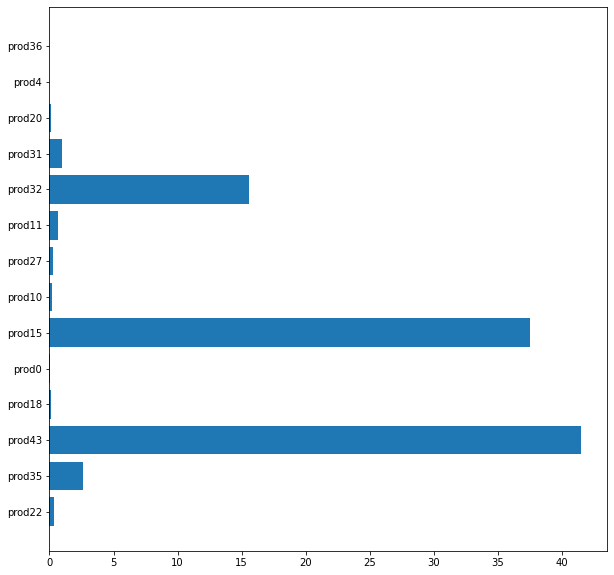

indH


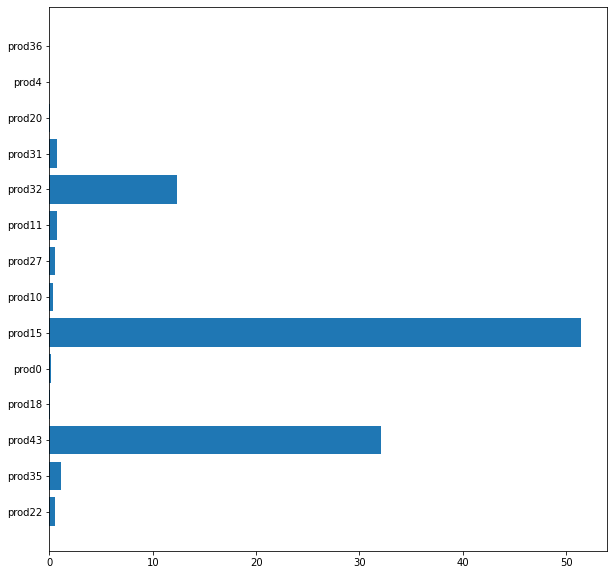

indL


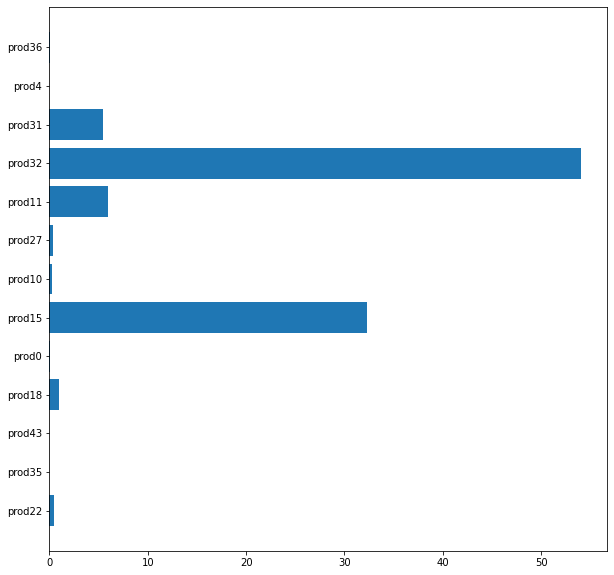

indA


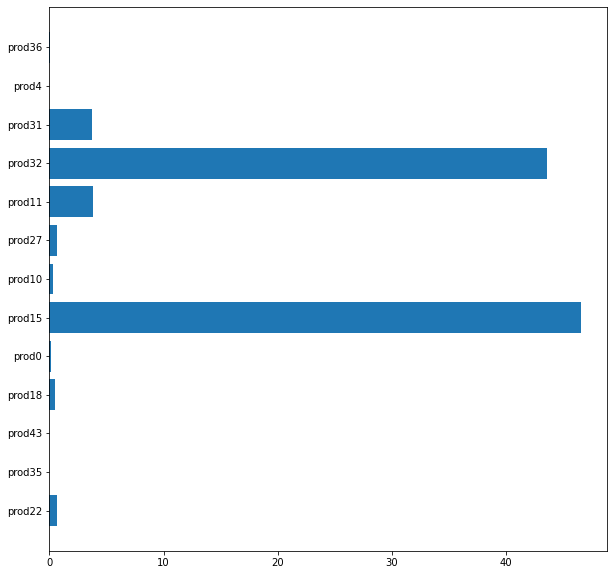

indD


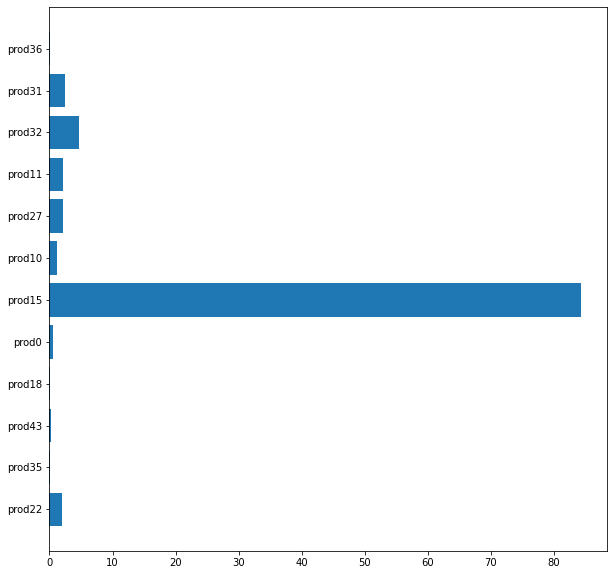

indK


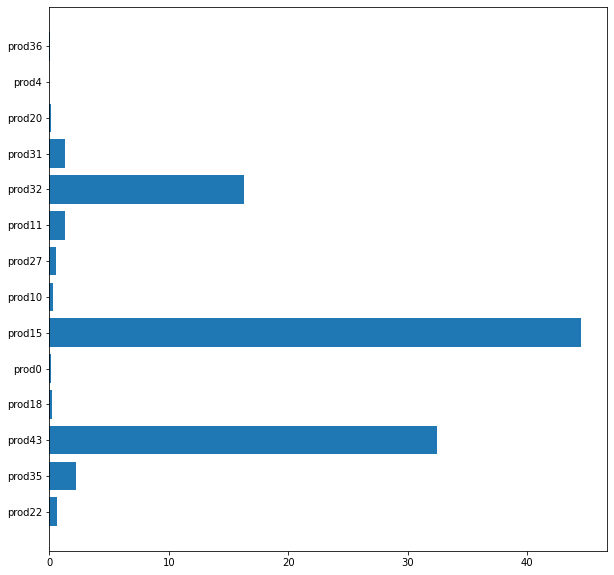

indM


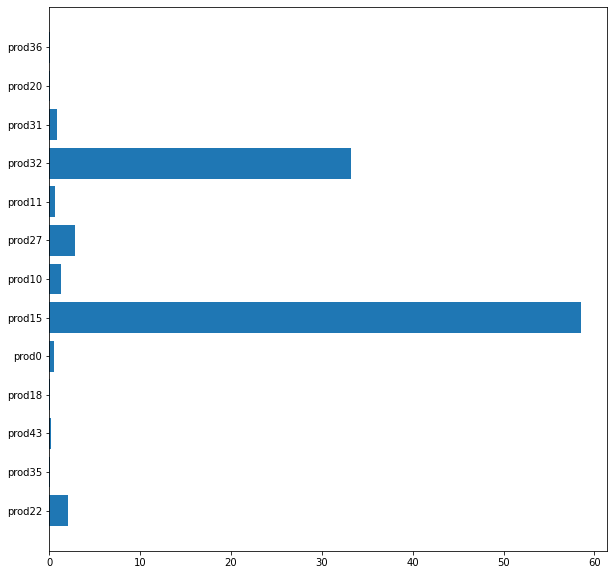

indE


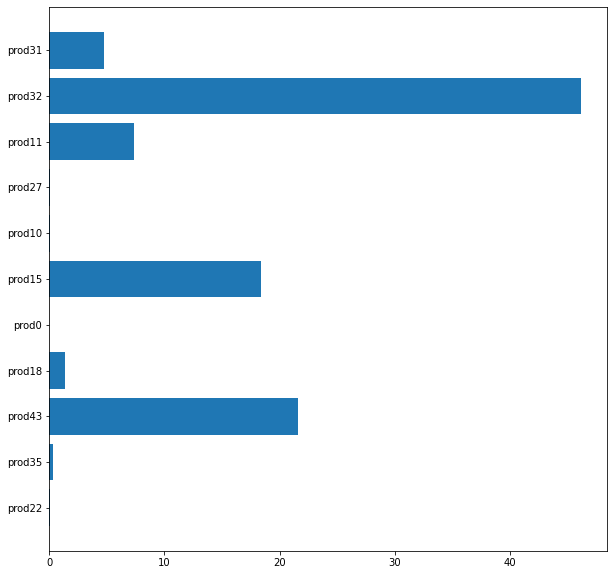

In [101]:
for ind in product_ms_ind.keys():
    print(ind)
    plt.figure(figsize=(10,10))
    plt.barh(*zip(*product_ms_ind[ind].items()))
    plt.show()
    

In [102]:
#PLC Curves

#country
#indication

In [103]:
def get_plc_curve_yearly(product):
    product_data = data[data['product']==product]
    plt.plot(product_data.groupby(data['date_year']).sum()['value'])
    plt.show()

In [104]:
def get_plc_curve_monthly(product):
    product_data = data[data['product']==product]
    plt.plot(product_data.groupby(product_data['date']).sum()['value'])
    plt.show()

In [105]:
def get_plc_curve_monthly_by_country(product,country):
    product_country_data = data[data['product']==product][data['country']==country]
    plt.plot(product_country_data.groupby(product_country_data['date']).sum()['value'])
    plt.show()

In [106]:
def get_plc_curve_monthly_by_indication(product,indication):
    product_country_data = data[data['product']==product][data['indication']==indication]
    plt.plot(product_country_data.groupby(product_country_data['date']).sum()['value'])
    plt.show()

In [107]:
def get_plc_curve_monthly_by_country_and_ind(product,country,indication):
    product_country_data = data[data['product']==product][data['country']==country][data['indication']==indication]
    plt.plot(product_country_data.groupby(product_country_data['date']).sum()['value'])
    plt.show()

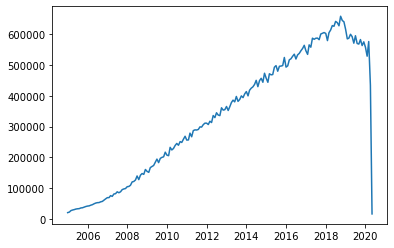

In [108]:
get_plc_curve_monthly("prod15")

In [109]:
for ind in indication_list :
    print(ind)
#     print(data[data['indication']==ind].country.nunique()
#     print(data[data['indication']==ind].date.min()
#     print(data[data['indication']==ind].date.max()
    print(data[data['indication']==ind].value.sum())

indI
59142938.8
indH
14542767.989999998
indL
8183358.53
indA
24829319.75
indD
611273.63
indK
37698326.67
indM
439188.06000000006
indE
977316.55


In [110]:
data.columns

Index(['product', 'manufacturer', 'molecule', 'class', 'bioSimilar',
       'division', 'country', 'area', 'sub_area', 'template', 'indication',
       'date', 'value', 'date_year', 'date_month', 'date_day'],
      dtype='object')

In [111]:
#Launch Date

In [112]:
launch_date_raw = {}

In [113]:
for prod in product_list :
    launch_date_raw[prod] = data[data['product'] == prod].date.min()

In [114]:
launch_date_raw

{'prod22': Timestamp('2016-01-01 00:00:00'),
 'prod35': Timestamp('2016-03-01 00:00:00'),
 'prod43': Timestamp('2005-01-01 00:00:00'),
 'prod18': Timestamp('2016-09-01 00:00:00'),
 'prod0': Timestamp('2018-11-01 00:00:00'),
 'prod15': Timestamp('2005-01-01 00:00:00'),
 'prod10': Timestamp('2018-11-01 00:00:00'),
 'prod27': Timestamp('2018-10-01 00:00:00'),
 'prod11': Timestamp('2013-12-01 00:00:00'),
 'prod32': Timestamp('2005-01-01 00:00:00'),
 'prod31': Timestamp('2013-10-01 00:00:00'),
 'prod20': Timestamp('2016-06-01 00:00:00'),
 'prod4': Timestamp('2018-01-01 00:00:00'),
 'prod36': Timestamp('2017-09-01 00:00:00')}

In [115]:
data[data['bioSimilar']=='prod43']['product'].unique()

array(['prod35', 'prod20'], dtype=object)

In [116]:
indication_list

array(['indI', 'indH', 'indL', 'indA', 'indD', 'indK', 'indM', 'indE'],
      dtype=object)

In [117]:
for prod in data['product'].unique() :
    print(prod,data[data['product']==prod]['country'].nunique())

prod22 23
prod35 20
prod43 50
prod18 8
prod0 14
prod15 53
prod10 20
prod27 13
prod11 25
prod32 49
prod31 33
prod20 4
prod4 1
prod36 5


In [118]:
country_list = data['country'].unique()

In [119]:
data['country'].nunique()

53

In [120]:
PRODUCT = 'prod20'
INDICATION = 'indK'
COUNTRY = 'United Kingdom'
#can you plot biosimilars too - combined biosimilar market share

Overall PLC for  indK


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


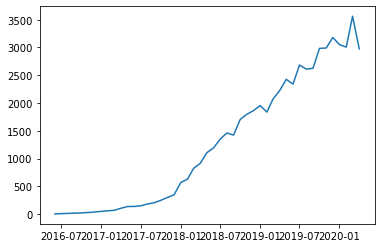

Overall Market Share for Indication  indK  across time and country :  0.1577
Market Share over Time Across Country for  indK


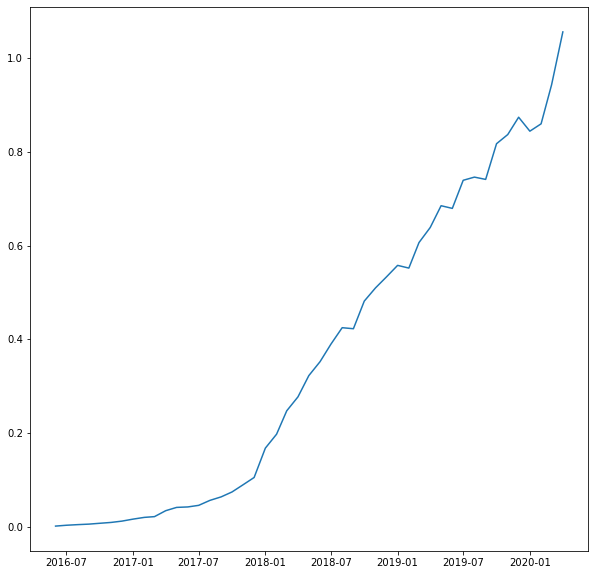

In [121]:
#What is PLC of Product for Indication
print("Overall PLC for ",INDICATION)
get_plc_curve_monthly_by_indication(PRODUCT,INDICATION)
#What is the market share for the Indication?
print("Overall Market Share for Indication ",INDICATION," across time and country : ",get_market_share_by_ind(INDICATION,PRODUCT,data))
#Market Share Over Time
market_share_over_time = {}
product_data = data[data['product'] == PRODUCT]
for date in list(dict.fromkeys(sorted(product_data['date']))):
    market_share_over_time[date] = get_market_share_at_datetime_by_indication(PRODUCT,INDICATION,data,date)
print("Market Share over Time Across Country for ",INDICATION)
plt.figure(figsize=(10,10))
plt.plot(*zip(*market_share_over_time.items()))
plt.show()

South Korea


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


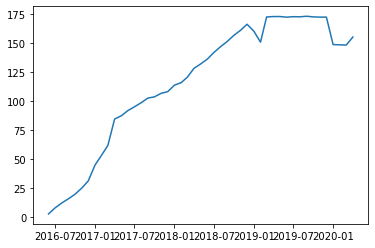

France


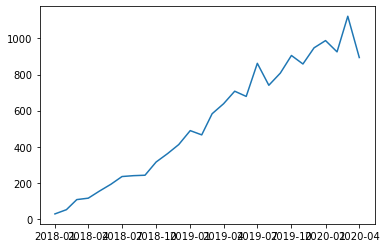

Canada


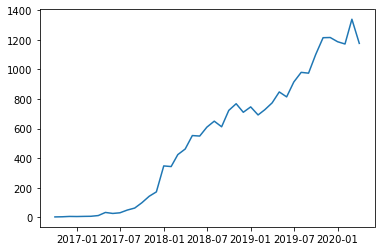

Australia


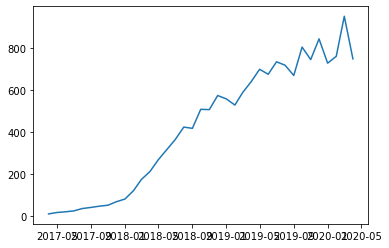

In [122]:
#How does it vary by country?
product_ind_data = data.loc[(data['product']==PRODUCT)&(data['indication']==INDICATION)]
for country in product_ind_data['country'].unique():
    print(country)
    get_plc_curve_monthly_by_country_and_ind(PRODUCT,country,INDICATION)

#filter to not print blank graphs 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Market Share Over Time for  United Kingdom  for  indK


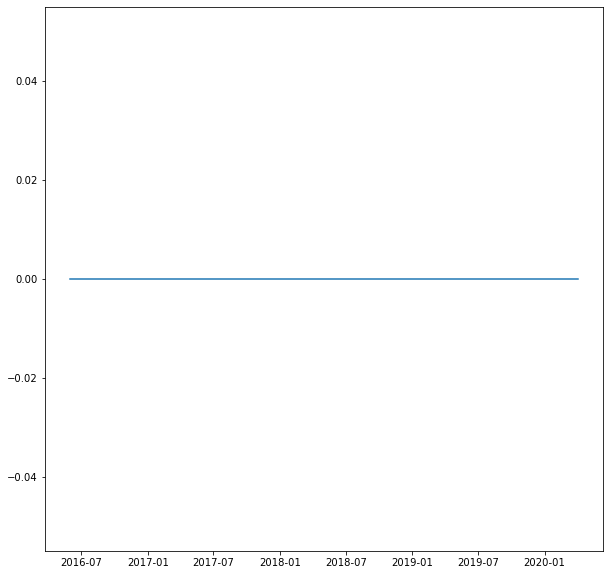

In [123]:
market_share_over_time = {}
product_data = data[data['product'] == PRODUCT]
for date in list(dict.fromkeys(sorted(product_data['date']))):
    market_share_over_time[date] = get_market_share_at_datetime_by_indication_for_country(PRODUCT,INDICATION,COUNTRY,data,date)
print("Market Share Over Time for ",COUNTRY," for ",INDICATION)
plt.figure(figsize=(10,10))
plt.plot(*zip(*market_share_over_time.items()))
plt.show()

#plot multiple products and show biosimilars on same graph and what other products are in market 
#can cluster price sensitive countries

In [124]:
def get_raw_launch_date_by_country_and_indication(data,country,indication):
    country_data = data[data['country']==country][data['indication']==indication]
    product_list = country_data['product'].unique()
    launch_date_raw = {}
    for prod in product_list :
        launch_date_raw[prod] = country_data[country_data['product'] == prod].date.min()
    return launch_date_raw

In [125]:
launch_date_raw = get_raw_launch_date_by_country_and_indication(data,COUNTRY,INDICATION)
launch_date_raw

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'prod22': Timestamp('2018-11-01 00:00:00'),
 'prod35': Timestamp('2016-03-01 00:00:00'),
 'prod43': Timestamp('2005-01-01 00:00:00'),
 'prod18': Timestamp('2017-07-01 00:00:00'),
 'prod15': Timestamp('2005-01-01 00:00:00'),
 'prod10': Timestamp('2018-12-01 00:00:00'),
 'prod27': Timestamp('2018-12-01 00:00:00'),
 'prod11': Timestamp('2015-03-01 00:00:00'),
 'prod32': Timestamp('2005-01-01 00:00:00'),
 'prod31': Timestamp('2015-05-01 00:00:00')}

In [126]:
market_share_day_1 = {}
country_data = data[data['country']==COUNTRY][data['indication']==INDICATION]
product_list = country_data['product'].unique()
for prod in product_list:
    market_share_day_1[prod] = get_market_share_at_datetime_by_indication_for_country(prod,INDICATION,COUNTRY,data,launch_date_raw[prod])
market_share_day_1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'prod22': 0.0084,
 'prod35': 0.0088,
 'prod43': 48.4153,
 'prod18': 0.0073,
 'prod15': 3.8021,
 'prod10': 0.0088,
 'prod27': 0.1663,
 'prod11': 0.0062,
 'prod32': 47.7826,
 'prod31': 0.0077}

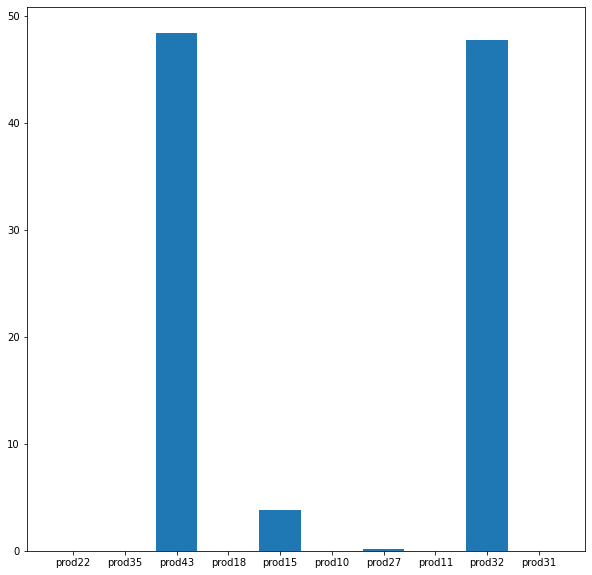

In [127]:
plt.figure(figsize=(10,10))
plt.bar(*zip(*market_share_day_1.items()))
plt.show()

In [128]:
THRESHOLD = 2.0000 #modified

In [129]:
market_share_over_time = {}
product_data = data[data['product'] == PRODUCT]
for date in list(dict.fromkeys(sorted(product_data['date']))):
    market_share_over_time[date] = get_market_share_at_datetime_by_indication_for_country(PRODUCT,INDICATION,COUNTRY,data,date)
for date in market_share_over_time.keys():
    if market_share_over_time[date]>=THRESHOLD:
        days_when_ms_threshold = date
        break

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [130]:
days_when_ms_threshold

NameError: name 'days_when_ms_threshold' is not defined

In [ ]:
launch_date_raw[PRODUCT]

In [ ]:
market_share_over_time

In [ ]:
days_when_ms_threshold = {}
for prod in product_list:
    market_share_over_time = {}
    product_data = data[data['product'] == prod]
    for date in list(dict.fromkeys(sorted(product_data['date']))):
        market_share_over_time[date] = get_market_share_at_datetime_by_indication_for_country(prod,INDICATION,COUNTRY,data,date)
    for date in market_share_over_time.keys():
        if market_share_over_time[date]>=THRESHOLD:
            days_when_ms_threshold[prod] = date
            break

In [ ]:
days_when_ms_threshold #launchdate 

In [ ]:
launch_date_raw

In [ ]:
market_share_day_1

In [ ]:
# def elbow(df1):
#     mms = MinMaxScaler()
#     mms.fit(df1)
#     data_transformed = mms.transform(df1)
#     Sum_of_squared_distances = []
#     K = range(1,15)
#     for k in K:
#         km = KMeans(n_clusters=k)
#         km = km.fit(data_transformed)
#         Sum_of_squared_distances.append(km.inertia_)
        
#     plt.plot(K, Sum_of_squared_distances, 'bx-')
#     plt.xlabel('k')
#     plt.ylabel('Sum_of_squared_distances')
#     plt.title('Elbow Method For Optimal k')
#     plt.show()
#     return data_transformed

In [ ]:
def clustering_data(data):
    data_original = data.copy()
    keep = ["product","country","date","indication", "value"]
    data_original = data_original[keep]
    data_prod = data_original.groupby(["product", "date","country","indication"], as_index = False).agg("sum")
    data_prod['time_period'] = pd.to_datetime(data_prod['date'])
    data_prod.drop(['date'], axis = 1, inplace = True)
    data_prod = data_prod.sort_values('time_period')
    data_prod.set_index('time_period', inplace =True)
    #data_prod.index.name = None
    #data_prod.reset_index(drop = True, inplace = True)
    return(data_prod)

In [ ]:
def clustering(indication_list,country_list,product_list,data_full):
    for prod in product_list:
        print('\n plot for the product: \n', prod)
        data_an1 = data[data['product']==prod]
        kmeans = KMeans(n_clusters=3, random_state=3452)
        y_kmeans = kmeans.fit_predict(data_an1)
        data_an['cluster'] = y_kmeans
    return data_an

In [ ]:
# clustering_data(data)
# clustering(indication_list,country_list,product_list,data)

In [ ]:
#CLUSTERING

In [ ]:
#CLUSTERING 1
#For every indication, country, product pair :
# -- > MARKET SHARE - 
# -- > GROWTH = DIFF IN PATIENT VALUE (MONTH OVER MONTH)
# -- > MONTH SINCE DATA AVAILABILITY (Where Lauch Date is Date when it is >2%) - this is a big assumption as first point was 89% for some as seen before
# Normalised using z-scores and did K-Means CLustering
# It separates out indication, country, product pair only and groups biosimlars together
# CLUSTERS : prod15, prod43, prod32, 

#-----
#Heirarchical Clustering for each -
#Country, Indication, Product :
#- total Life length
#- max market share
#- avg market share
#- avg growth rate in plc growth phase till it reaches max market share
#- avg growth rate in decline is after thar


#CLUSTERING 2
#For every indication, country, product pair :
# -- > Product Lifecyle Curve
# Normalised using z-scores and Kmeans - do Heirarchical CLustering - still in progress


In [ ]:
# INDICATION = 'indK'
# COUNTRY = 'United Kingdom'

In [ ]:
# for prod in product_list:
#     for ind in indication_list:
#         for country in country_list:
#             data['PLC']           

In [ ]:
def get_life_length(indication,country,product):
    data = data

In [ ]:
def get_max_market_share(indication,country,product):
    

In [ ]:
for ind in indication_list:
    for country in country_list:

In [ ]:
def clustering_data(data):
    data_original = data.copy()
    keep = ["product","country","date","indication", "value"]
    data_original = data_original[keep]
    data_prod = data_original.groupby(["product", "date","country","indication"], as_index = False).agg("sum")
    data_prod['time_period'] = pd.to_datetime(data_prod['date'])
    data_prod.drop(['date'], axis = 1, inplace = True)
    data_prod = data_prod.sort_values('time_period')
    data_prod.set_index('time_period', inplace =True)
    #data_prod.index.name = None
    #data_prod.reset_index(drop = True, inplace = True)
    return(data_prod)

In [ ]:
#Multiple products, multiple indications, multiple countries 
#---
#Per indication, which countries are similar regardless of product - LOOK FOR BROADER AGGREGATED FEATURES - biosimilar adoption rate, market size,competitive nature of the market, population normalisation -  rather individual product - THINK OF FEATURE THAT FIND DIFFERENCES BETWEEN COUNTRIES 
#Per country cluster, clustering of PLC into 4 phases


In [ ]:
indication_list #pick from these indication - pick from size

In [ ]:
country_list

In [ ]:
#COUNTRY_LEVEL FEATURES
#market size - normalize with population data - WORLD HEALTH - snapshot of time 2015-2020 
#calculate over time -> 5 year period ? 
#CAGR -> divide by population - growth phase - 2%-max market share
#CAGR -> divide by population - decline phase - 2%-max market share
--
#GO BACK 4-5 years 

#market size - time series
#Number of competitors - time series 
#biosimilar percentage - time series 

#exponential smoothing - and tune lambda
#Static features - clustering 

market_size = {}

for ind in indication_list:
    market_size[ind] = {}
    for country in country_list:
        market_size[ind][country] = data.loc[(data['indication']==ind)&(data['country']==country)].value.sum()
    

In [ ]:
#ASSUMPTIONS

In [ ]:
market_size

In [ ]:
number_of_biosimilars_in_market = {} #calculate time series (competiton proxy)

for ind in indication_list:
    number_of_biosimilars_in_market[ind] = {}
    for country in country_list:
        ind_cont_data = data.loc[(data['indication']==ind)&(data['country']==country)]
        number_of_biosimilars_in_market[ind][country]= (ind_cont_data['bioSimilar']).nunique()

In [ ]:
number_of_biosimilars_in_market

In [ ]:
ind = 'indH'

In [ ]:
number_of_biosimilars_in_market[ind]
market_size[ind]

In [ ]:
#COUNTRY CLUSTERING

In [ ]:
data = pd.read_csv('combined_timeseries.csv')
data = data.drop("Unnamed: 0",axis=1)
data['date']= pd.to_datetime(data['date']) 

In [ ]:
product_level_data = data.drop(["division","area","template","sub_area"],axis=1)

In [ ]:
product_level_data

In [131]:
product_level_data = product_level_data[pd.DatetimeIndex(data['date']).year >= 2015]

NameError: name 'product_level_data' is not defined

In [132]:
product_level_data['date'].min()

NameError: name 'product_level_data' is not defined

In [133]:
product_level_data['date'].max()

NameError: name 'product_level_data' is not defined

In [134]:
market_share = []

for index, row in product_level_data.iterrows():
    market_share.append(get_market_share_at_datetime_by_indication_for_country(row['product'],row['indication'],row['country'],product_level_data,row['date']))

NameError: name 'product_level_data' is not defined

In [135]:
#product_level_data['marketShare'] = market_share
len(product_level_data)

NameError: name 'product_level_data' is not defined

In [136]:
product_level_data

NameError: name 'product_level_data' is not defined

In [137]:
# NUMBER OF BIOSIMILARS IN MARKET  - Arushi
# MARKET SHARE OF COUNTRY IN WORLD/POPULATION - Arushi

In [146]:
data = data[pd.DatetimeIndex(data['date']).year >= 2015]

In [147]:
def get_number_of_biosimilars_monthly_by_country(country,data):
    country_data = data[data['country']==country]
    return country_data.groupby('date').nunique()

In [148]:
number_of_biosimilars = {}

for country in country_list:
    number_of_biosimilars[country] = get_number_of_biosimilars_monthly_by_country(country,data)['bioSimilar']


In [149]:
date_list = data['date'].unique()

In [151]:
#number_of_biosimilars

In [152]:
v___ = []
v___n = []
for k,v in number_of_biosimilars.items():
    # print(v.values)
    addt = 65 - len(v)
    v_1 = v.values.tolist() + [np.nan]*addt
    v___.append(v_1)
    print(len(v_1))
    v___n.append(k)

#v___ =   np.array( v___ ) 
print( v___ )


    

65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
[[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, nan], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, nan, nan], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, nan, nan], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, nan], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [153]:
biosimilar = pd.DataFrame([])
biosimilar.index = date_list
biosimilar.columns = country_list

ValueError: Length mismatch: Expected axis has 0 elements, new values have 65 elements

In [145]:
i = 0
for country in country_list:
    i = 0
    for date in date_list:
        if i>len(number_of_biosimilars[country]):
            print(biosimilar[country])
            biosimilar[country][date] = np.nan
        else:
            biosimilar[country][date] = number_of_biosimilars[country][i]
        i+=1
        

KeyError: 'United Kingdom'

In [ ]:
def get_market_share_by_country(country,data):
    total = data.groupby('date').sum()
    country_data = data[data['country']==country]
    return country_data.groupby('date').sum()/total
    

In [ ]:
market_share_by_country = {}

for country in country_list:
    market_share_by_country[country] = get_market_share_by_country(country,data)

In [ ]:
market_share_by_country